Index(['Charged Off', 'Current', 'Does not meet the credit policy',
       'Fully Paid', 'Late', 'Unknown'],
      dtype='object')
0    1
1    1
2    1
3    3
4    1
Name: grade, dtype: int64
0    1
1    1
2    1
3    3
4    1
Name: grade, dtype: int64


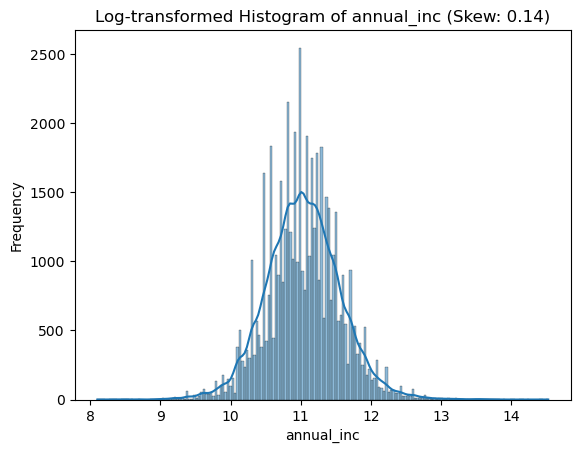

New skewness of annual_inc: 0.14


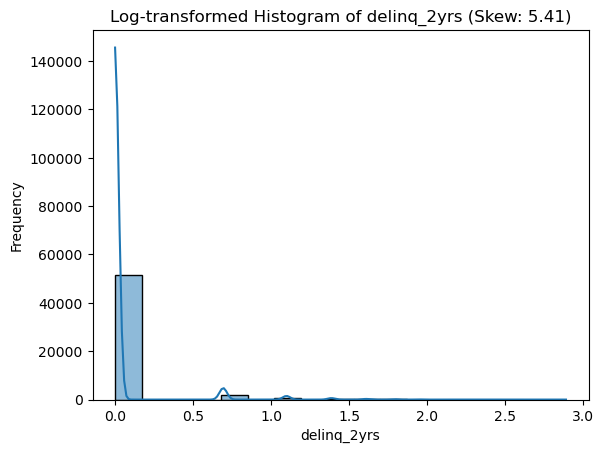

New skewness of delinq_2yrs: 5.41


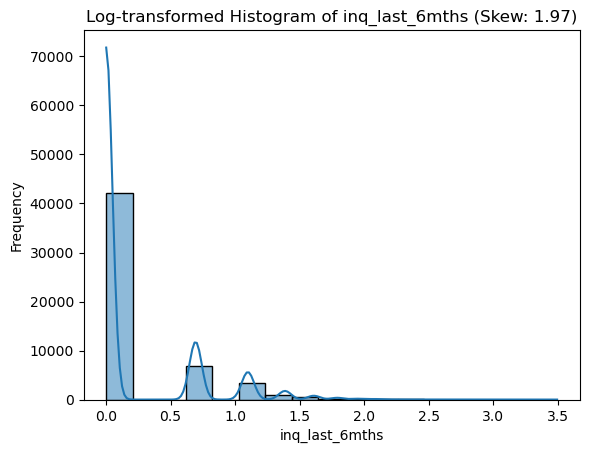

New skewness of inq_last_6mths: 1.97


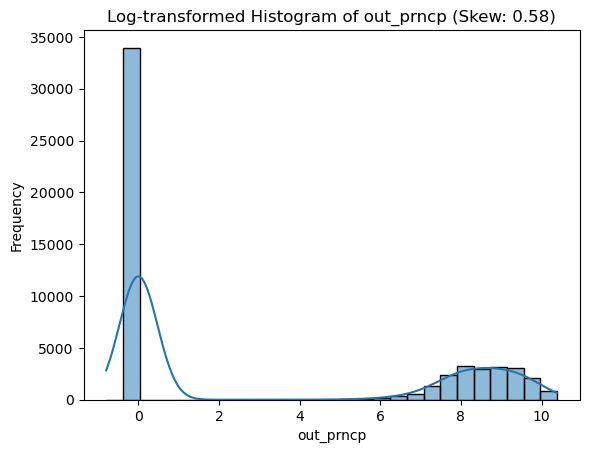

New skewness of out_prncp: 0.58


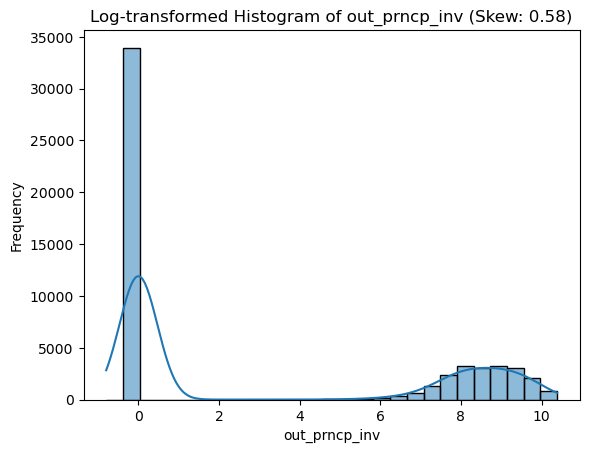

New skewness of out_prncp_inv: 0.58


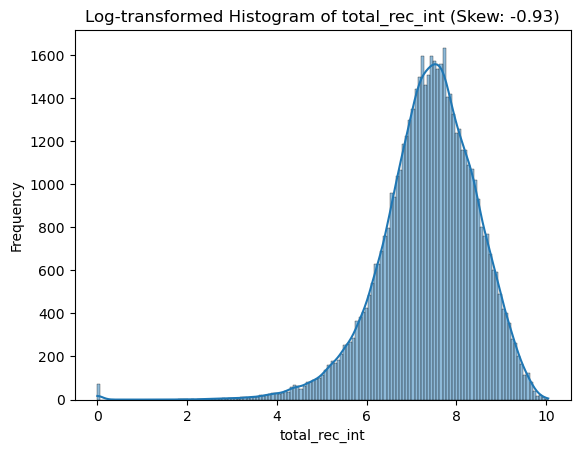

New skewness of total_rec_int: -0.93


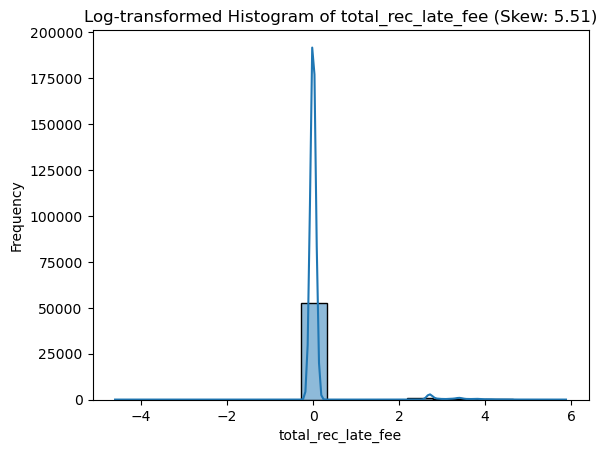

New skewness of total_rec_late_fee: 5.51


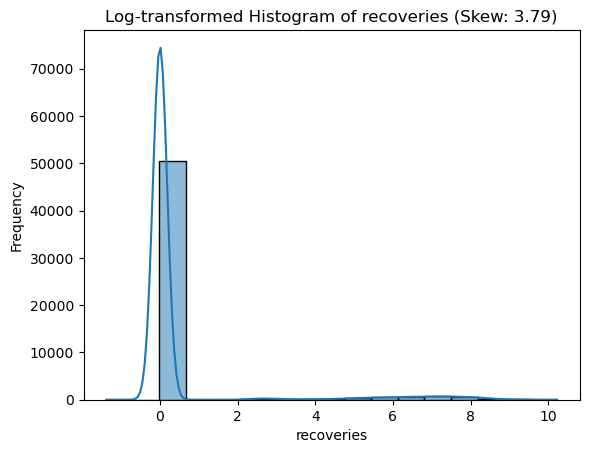

New skewness of recoveries: 3.79


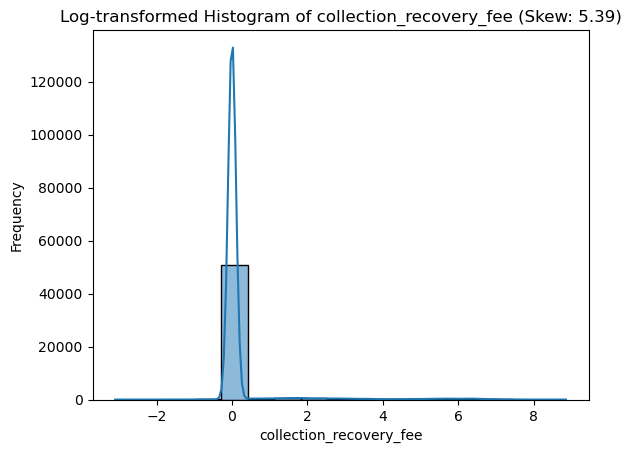

New skewness of collection_recovery_fee: 5.39


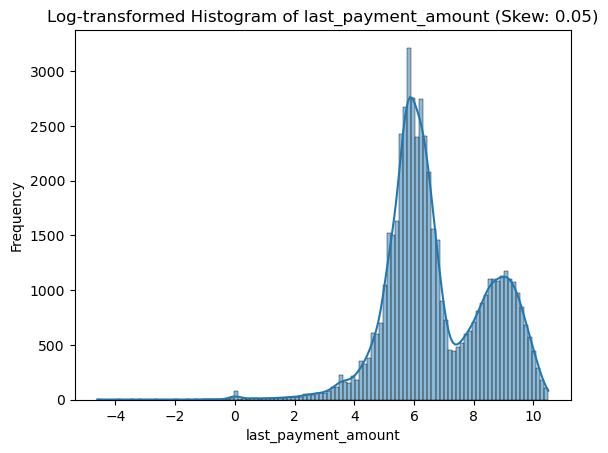

New skewness of last_payment_amount: 0.05
Applied Box-Cox transformation to 'loan_amount'.


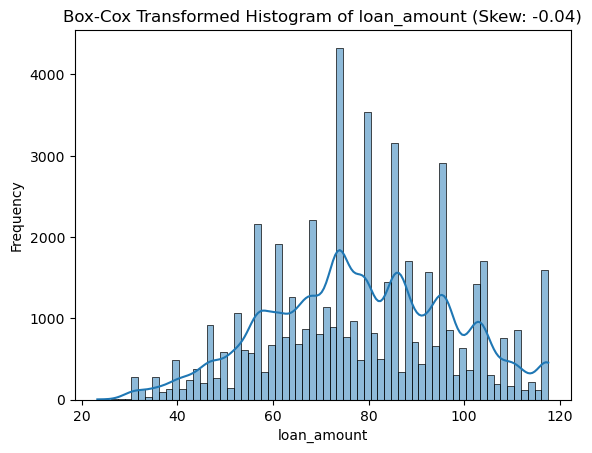

New skewness of loan_amount: -0.04
Applied Box-Cox transformation to 'funded_amount'.


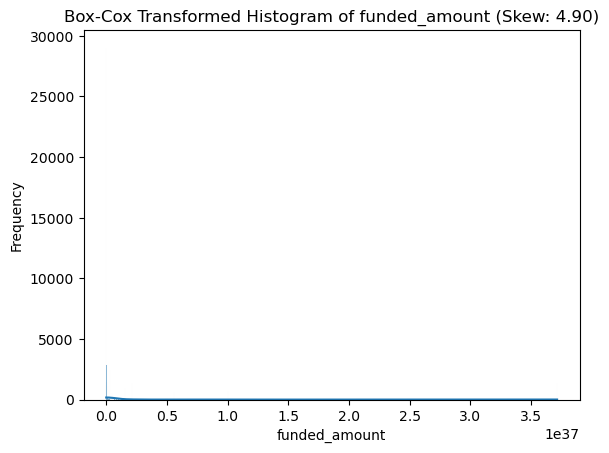

New skewness of funded_amount: 4.90
Adjusting 'funded_amount_inv' by adding 1.0 to make all values positive.
Applied Box-Cox transformation to 'funded_amount_inv'.


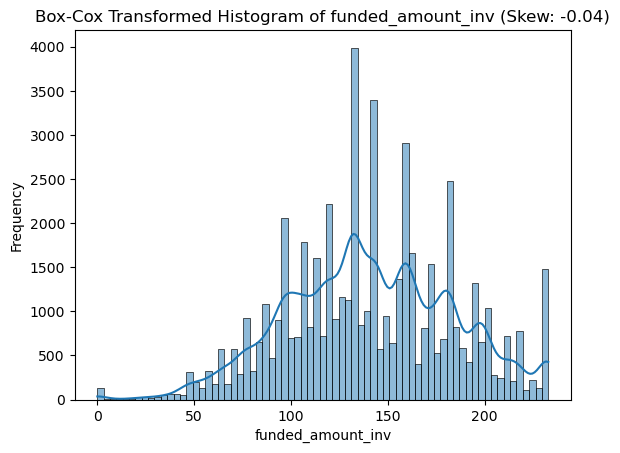

New skewness of funded_amount_inv: -0.04


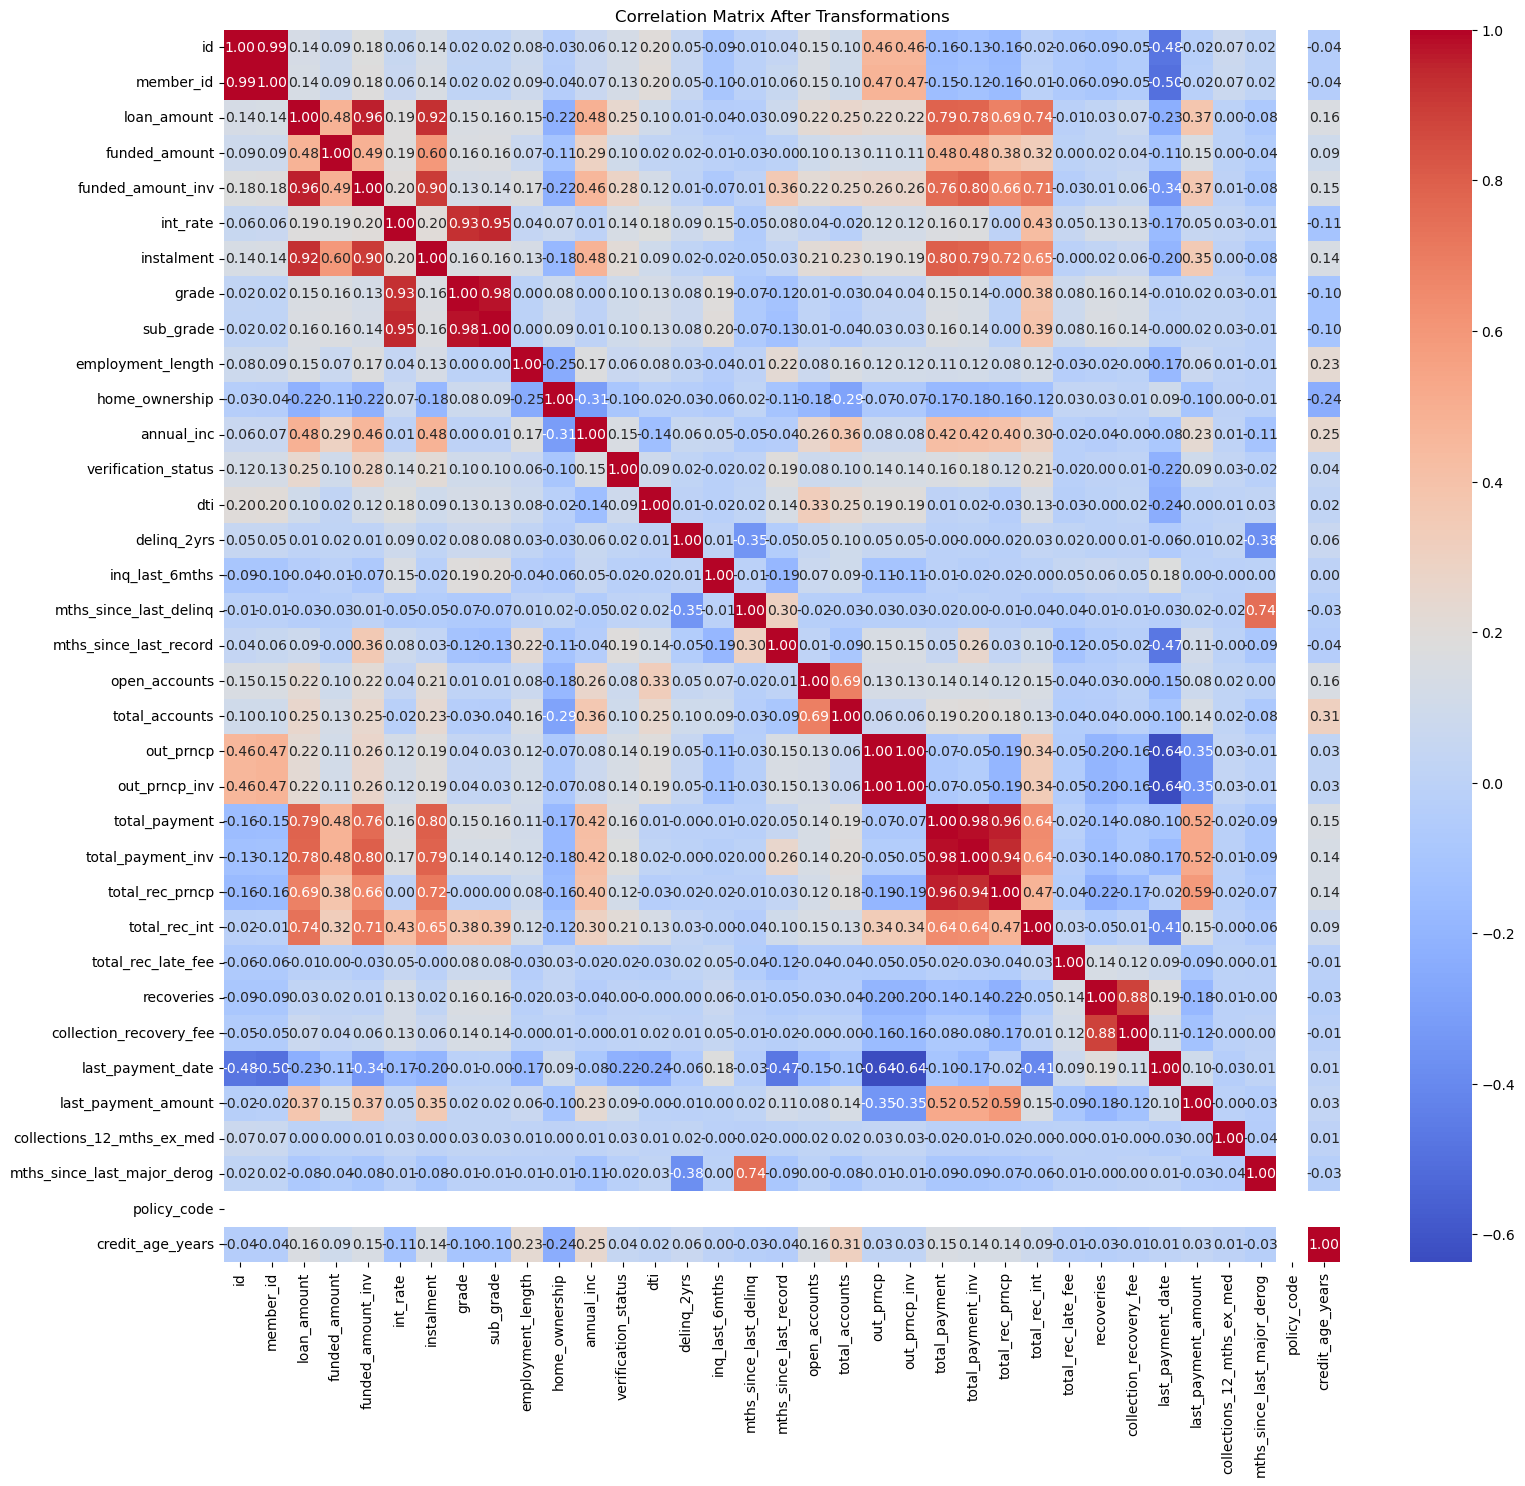

Severe Skewed Columns:


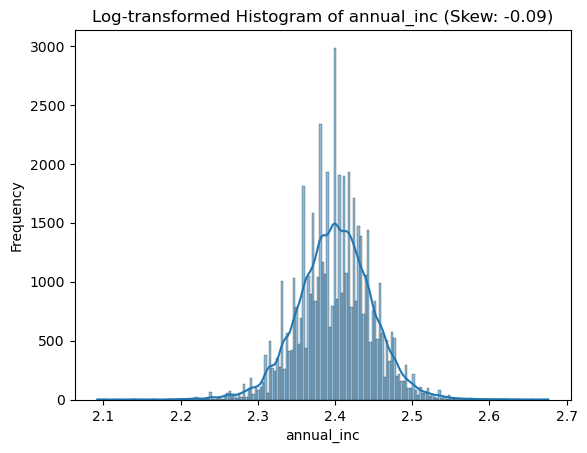

New skewness of annual_inc: -0.09


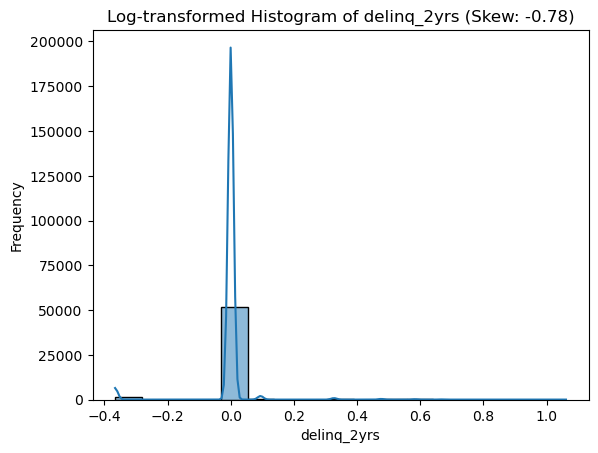

New skewness of delinq_2yrs: -0.78


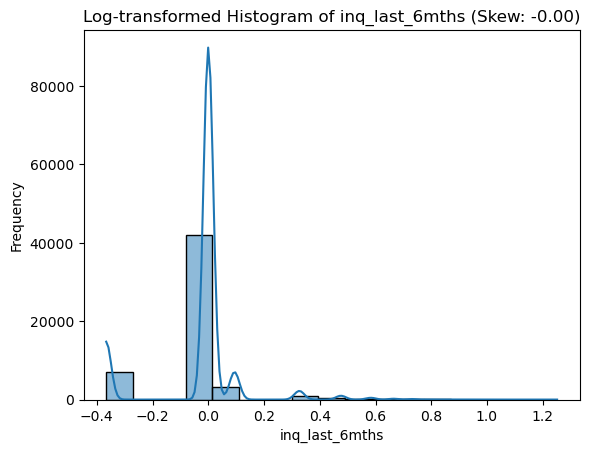

New skewness of inq_last_6mths: -0.00


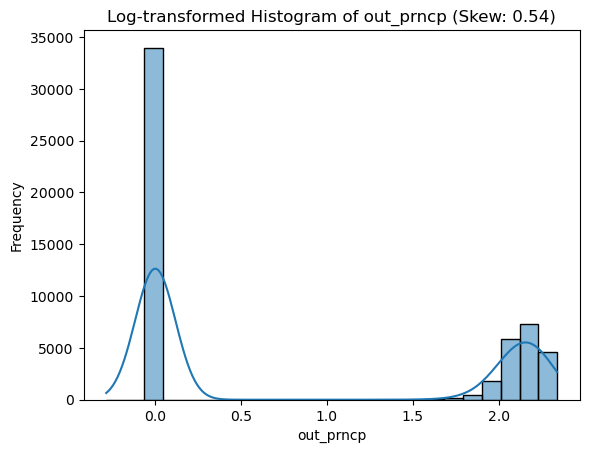

New skewness of out_prncp: 0.54


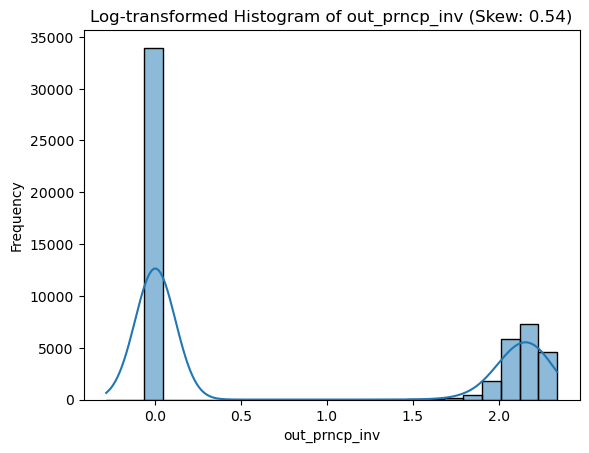

New skewness of out_prncp_inv: 0.54


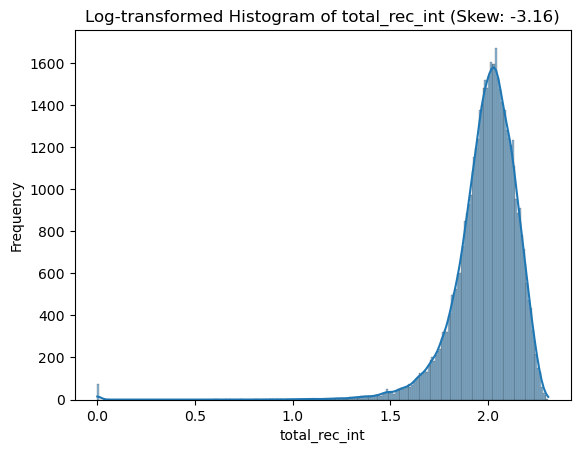

New skewness of total_rec_int: -3.16


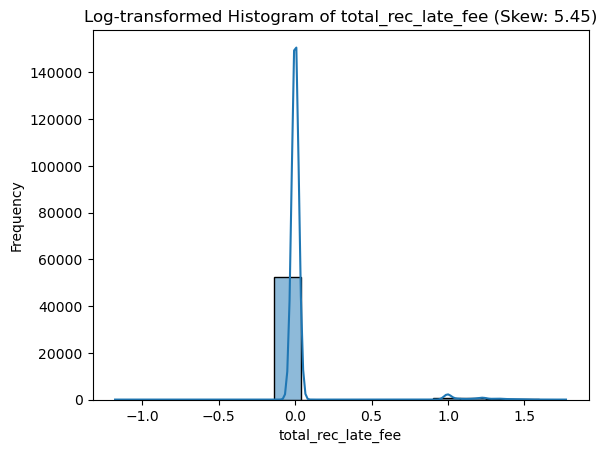

New skewness of total_rec_late_fee: 5.45


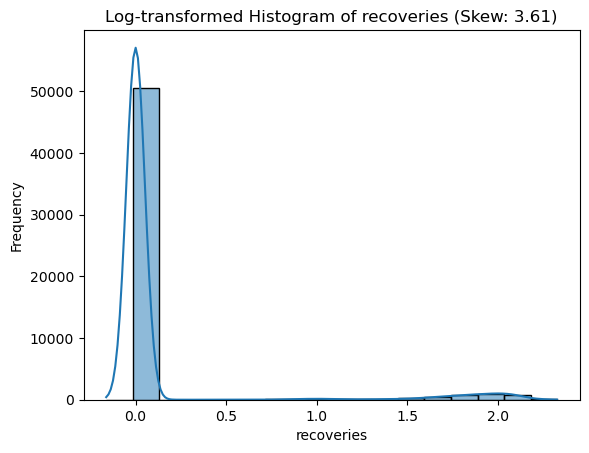

New skewness of recoveries: 3.61


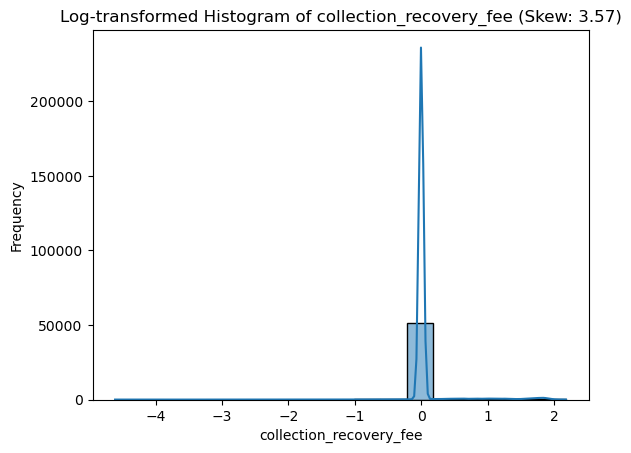

New skewness of collection_recovery_fee: 3.57


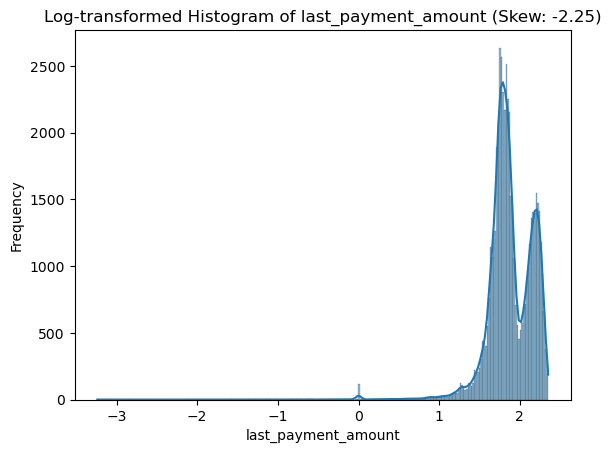

New skewness of last_payment_amount: -2.25

Moderate Skewed Columns:
Applied Box-Cox transformation to 'loan_amount'.


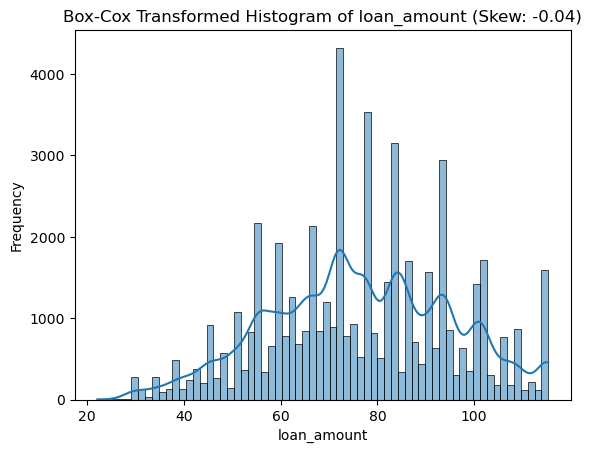

New skewness of loan_amount: -0.04
Applied Box-Cox transformation to 'funded_amount'.


/Users/charliesmith/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:922: RuntimeWarning: overflow encountered in power
  variance = np.var(data**lmb / lmb, axis=0)


ValueError: array must not contain infs or NaNs

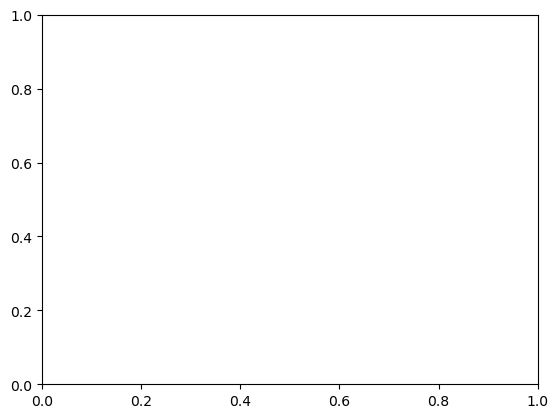

In [2]:
# Import necessary libraries
import pandas as pd
import importlib
import data_cleaning
import data_analysis
import matplotlib.pyplot as plt
import seaborn as sns
from data_cleaning import DataTransform
from data_analysis import DataFrameTransform
from scipy.stats import boxcox

# Reload the modules to apply changes if needed
importlib.reload(data_cleaning)
importlib.reload(data_analysis)

# Read the data
data_frame = pd.read_csv('loan_payments.csv')

# Step 1: Clean and transform the data
# Create an instance of the DataTransform class
transformer = DataTransform(data_frame)

# Apply the conversion methods to clean the data
data_frame = transformer.convert_sub_grade()
data_frame = transformer.convert_grade()
data_frame = transformer.convert_employment_length()
data_frame = transformer.convert_home_ownership()
data_frame = transformer.convert_issue_date()
data_frame = transformer.convert_last_payment_date()
data_frame = transformer.convert_last_credit_pull_date()
data_frame = transformer.convert_verification_status()
data_frame = transformer.convert_earliest_credit_line()

# Step 2: Analyze the data for skewness and transformations
# Create an instance of DataFrameTransform with the cleaned DataFrame
df_transform = DataFrameTransform(data_frame)

# Apply log transformation to columns with severe skewness
df_transform.log_transform_severe_skew()

# Apply Box-Cox transformation to columns with moderate skewness
df_transform.box_cox_transform_moderate_skew()

# Step 3: Plot and review results
# Plot the correlation matrix after transformations
correlation_matrix = data_frame.corr()

plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix After Transformations')
plt.show()

# Perform analysis using DataFrameTransform
analysis = DataFrameTransform(data_frame)

# Print severe skewed columns
print("Severe Skewed Columns:")
analysis.log_transform_severe_skew()

# Print moderate skewed columns
print("\nModerate Skewed Columns:")
analysis.box_cox_transform_moderate_skew()

In [5]:
# Import required modules
import pandas as pd
from data_cleaning import DataTransform
from data_analysis import Plotter, DataFrameTransform

# Load the dataset
data_frame = pd.read_csv('loan_payments.csv')

Applying log transformation to columns with severe skewness...


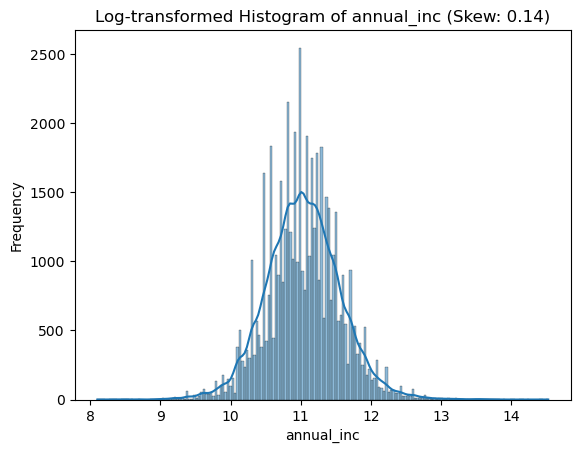

New skewness of annual_inc: 0.14


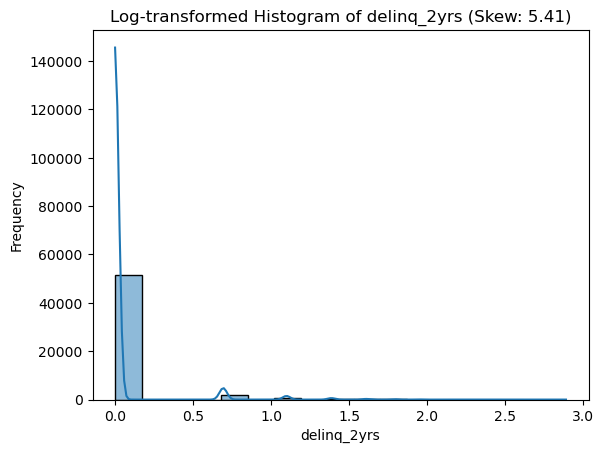

New skewness of delinq_2yrs: 5.41


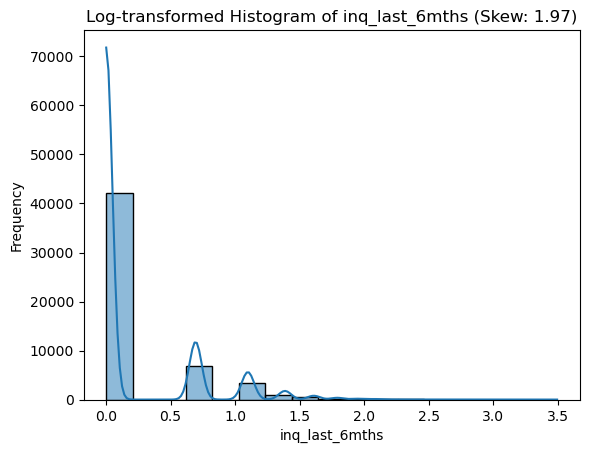

New skewness of inq_last_6mths: 1.97


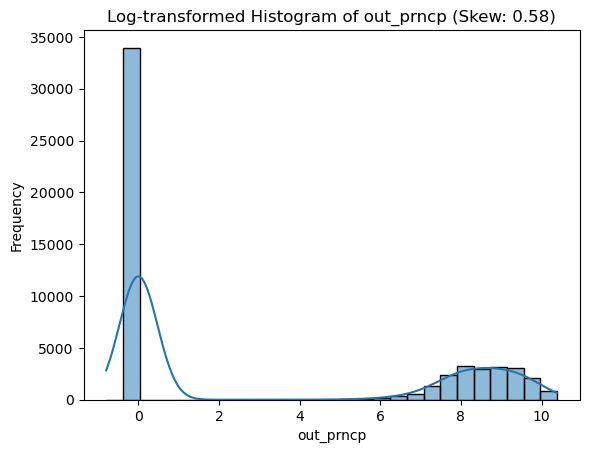

New skewness of out_prncp: 0.58


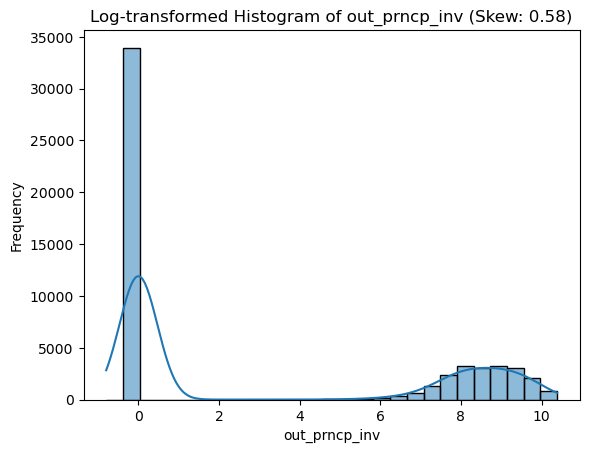

New skewness of out_prncp_inv: 0.58


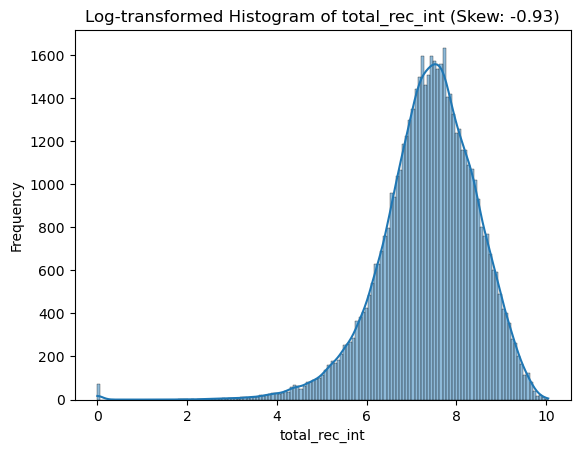

New skewness of total_rec_int: -0.93


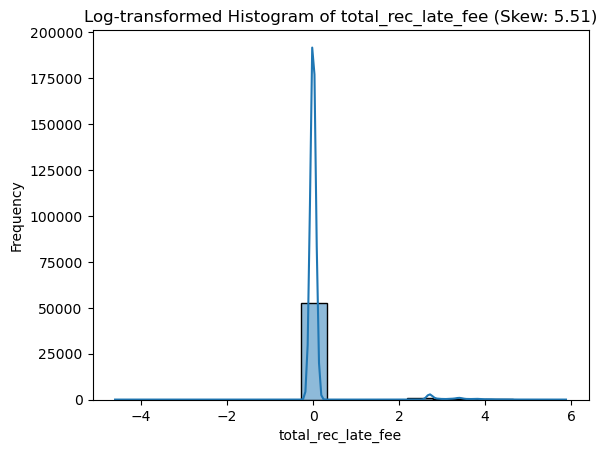

New skewness of total_rec_late_fee: 5.51


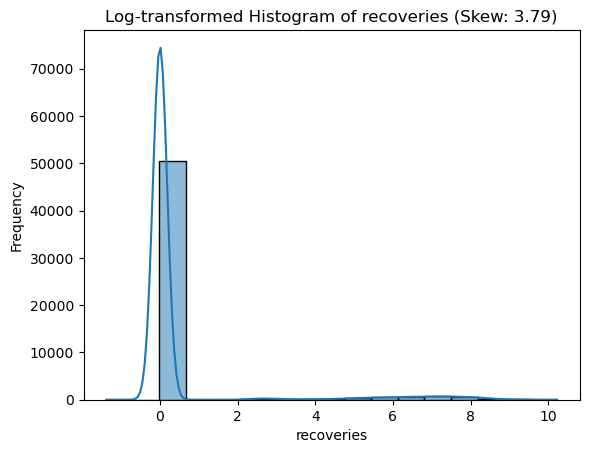

New skewness of recoveries: 3.79


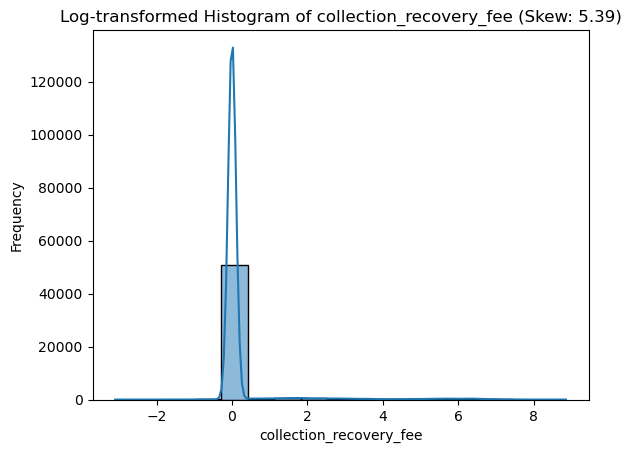

New skewness of collection_recovery_fee: 5.39


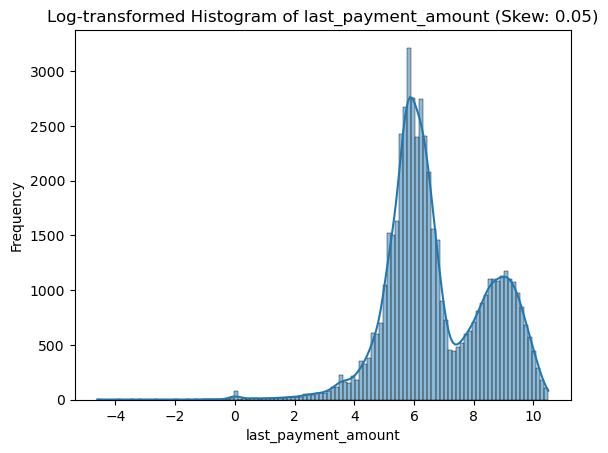

New skewness of last_payment_amount: 0.05
Applying Box-Cox transformation to columns with moderate skewness...
Applied Box-Cox transformation to 'loan_amount'.


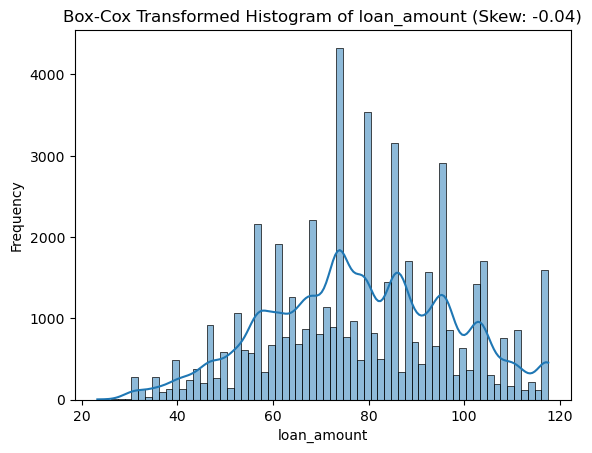

New skewness of loan_amount: -0.04
Applied Box-Cox transformation to 'funded_amount'.


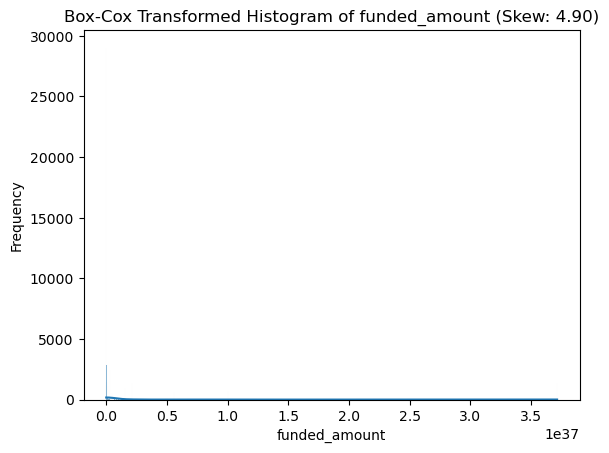

New skewness of funded_amount: 4.90
Adjusting 'funded_amount_inv' by adding 1.0 to make all values positive.
Applied Box-Cox transformation to 'funded_amount_inv'.


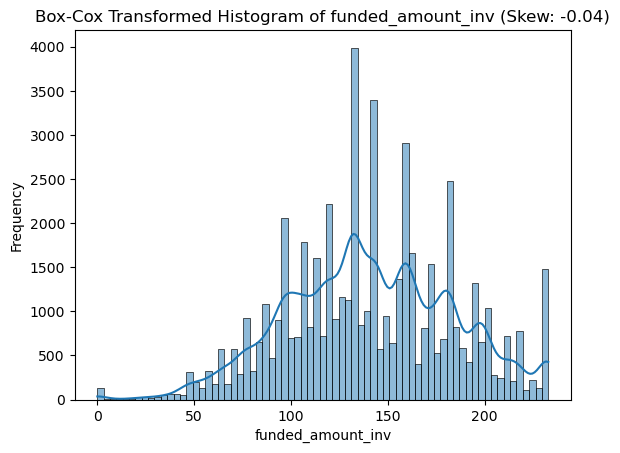

New skewness of funded_amount_inv: -0.04


In [6]:
# Initialize the transformation class
transformer = DataFrameTransform(data_frame)

# Apply log transformation for severe skewness
print("Applying log transformation to columns with severe skewness...")
transformer.log_transform_severe_skew()

# Apply Box-Cox transformation for moderate skewness
print("Applying Box-Cox transformation to columns with moderate skewness...")
transformer.box_cox_transform_moderate_skew()

Plotting histograms for specific columns...


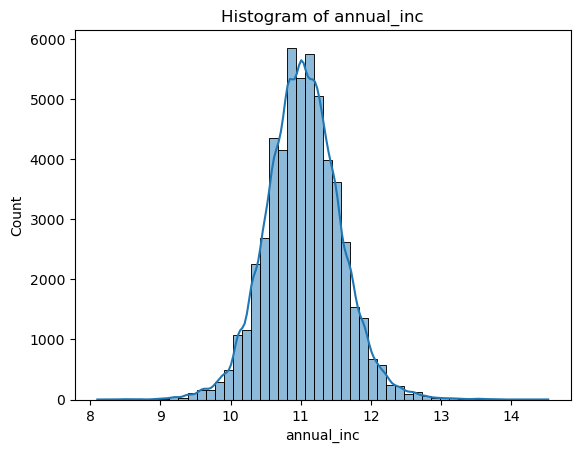

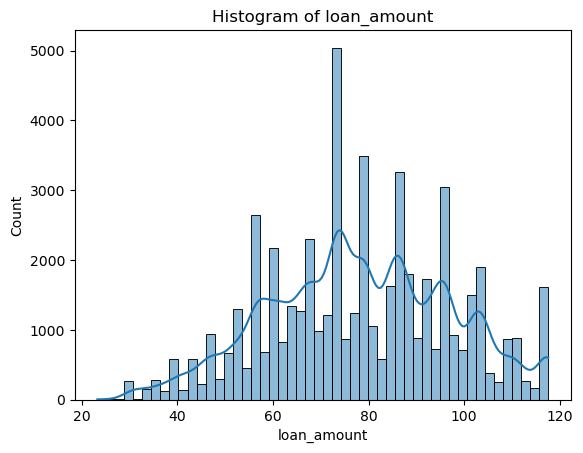

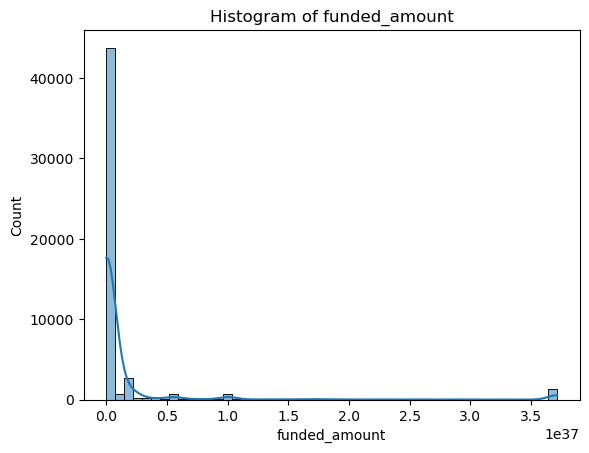

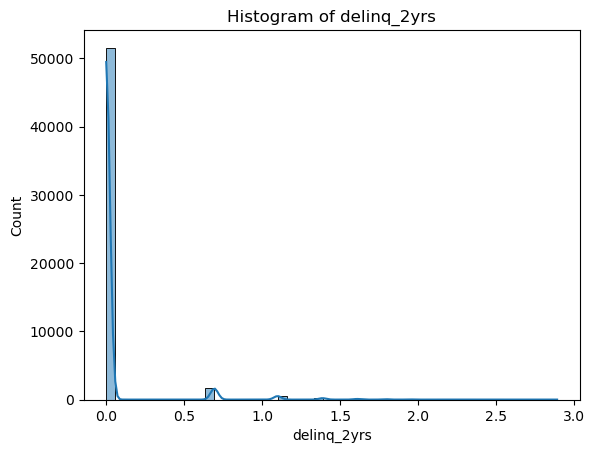

In [7]:
# Create an instance of the Plotter class with the updated DataFrame
plotter = Plotter(transformer.df)

# Plot histograms for specific columns to verify transformations
columns_to_plot = ['annual_inc', 'loan_amount', 'funded_amount', 'delinq_2yrs']
print("Plotting histograms for specific columns...")
for column in columns_to_plot:
    plotter.plot_histogram(column)

In [16]:
print("Plotting histograms for all numeric columns to check for outliers...")
plotter.plot_all_numeric_columns()

Plotting histograms for all numeric columns to check for outliers...


AttributeError: 'Plotter' object has no attribute 'plot_all_numeric_columns'

In [18]:
import importlib
import data_analysis  # Make sure the file is correctly imported
import pandas as pd

# Reload the module
importlib.reload(data_analysis)

# Create an instance of Plotter with your DataFrame
from data_analysis import Plotter
plotter = Plotter(data_frame)

In [19]:
print(dir(plotter))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'df', 'plot_all_numeric_columns', 'plot_histogram', 'plot_missing_values']


Plotting histograms for all numeric columns to check for outliers...
Plotting histogram for id


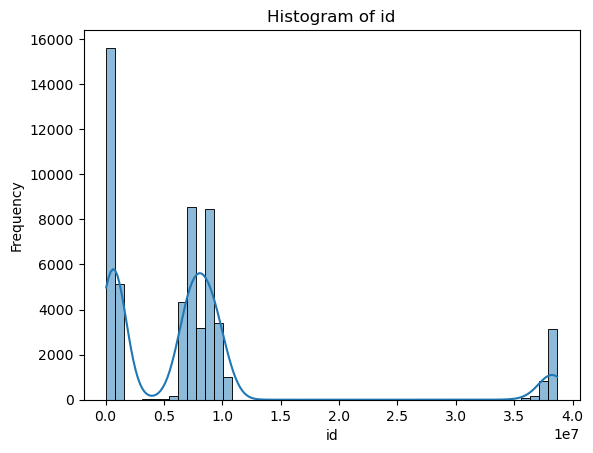

Plotting histogram for member_id


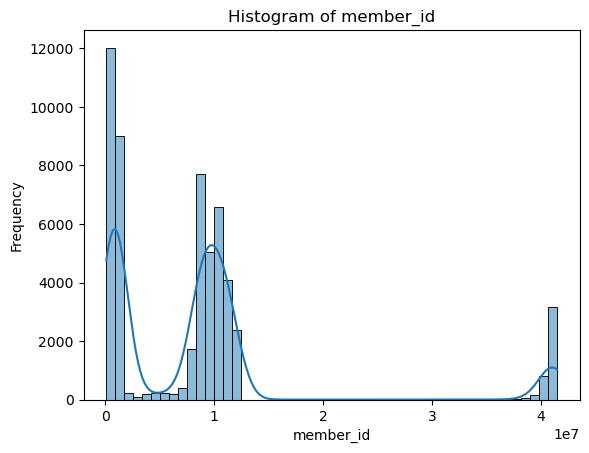

Plotting histogram for loan_amount


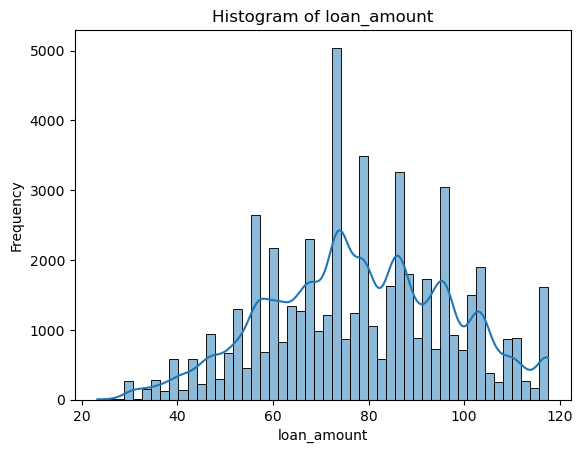

Plotting histogram for funded_amount


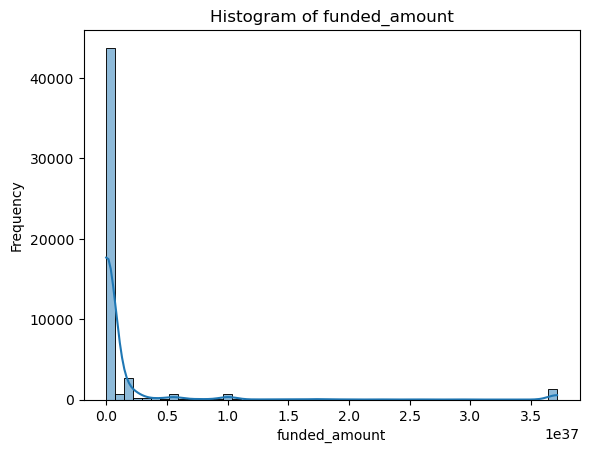

Plotting histogram for funded_amount_inv


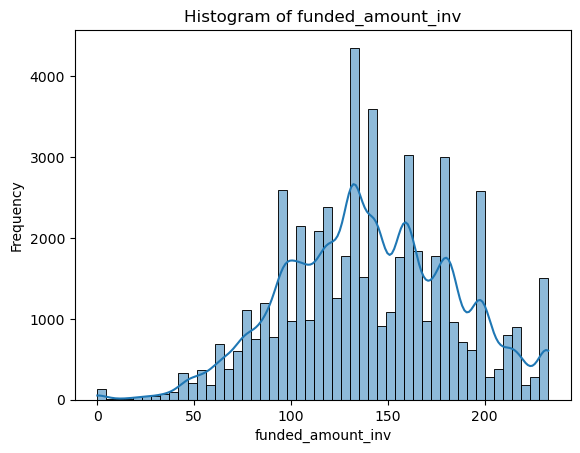

Plotting histogram for int_rate


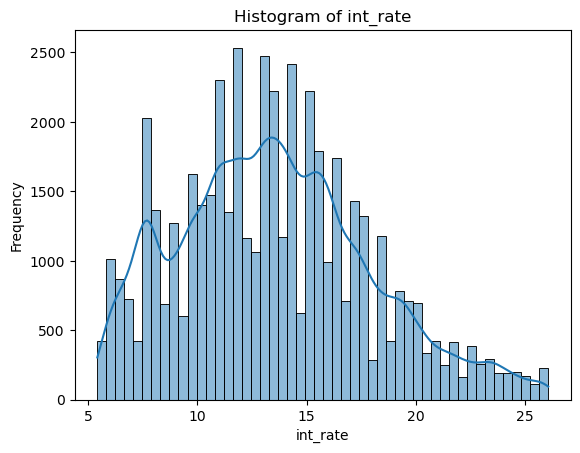

Plotting histogram for instalment


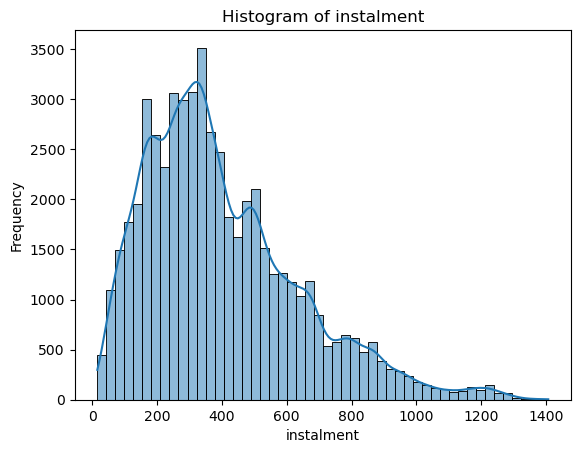

Plotting histogram for annual_inc


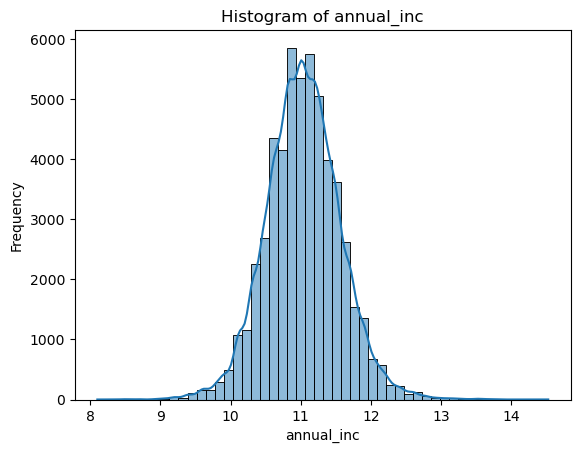

Plotting histogram for dti


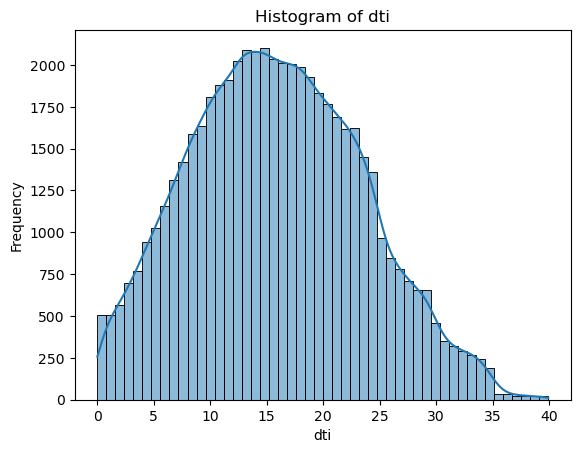

Plotting histogram for delinq_2yrs


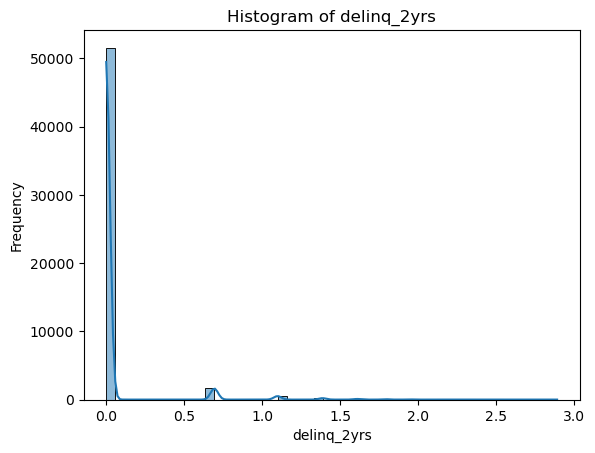

Plotting histogram for inq_last_6mths


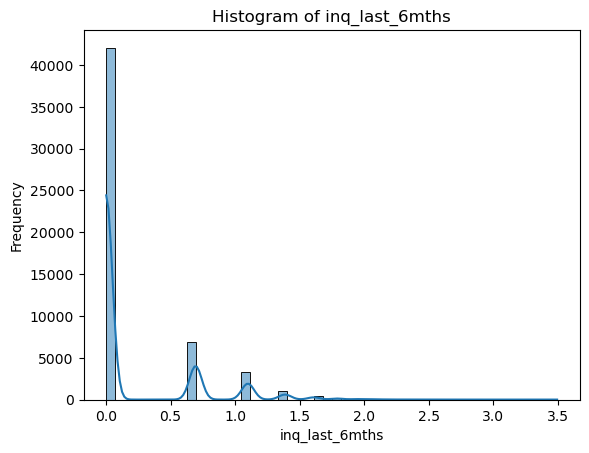

Plotting histogram for mths_since_last_delinq


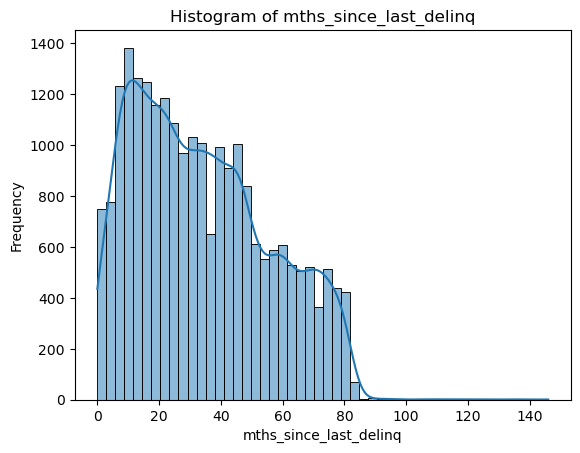

Plotting histogram for mths_since_last_record


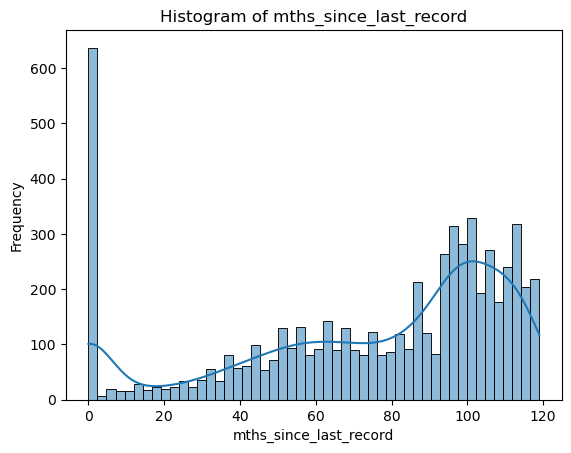

Plotting histogram for open_accounts


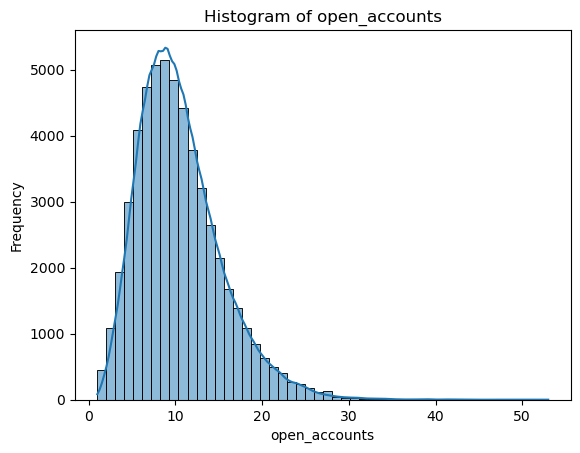

Plotting histogram for total_accounts


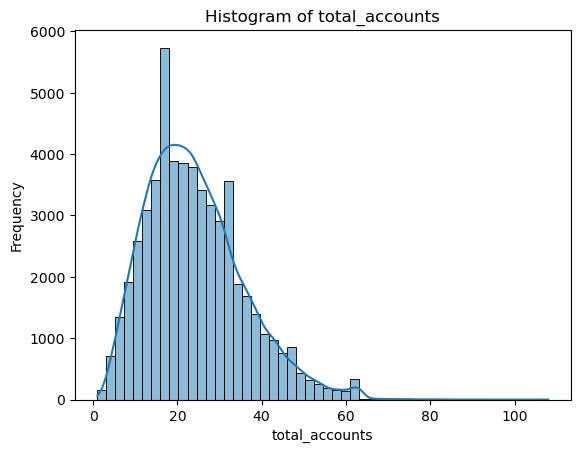

Plotting histogram for out_prncp


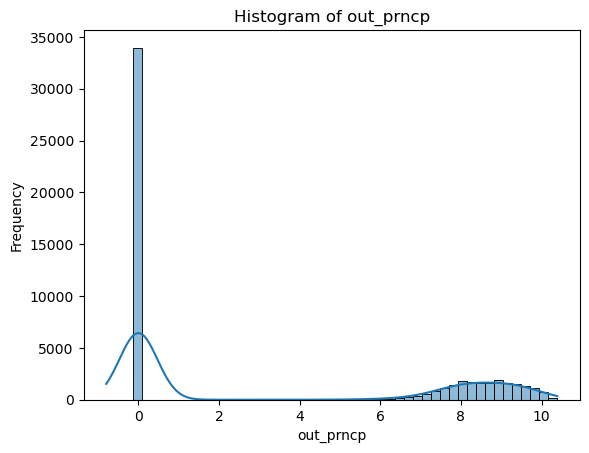

Plotting histogram for out_prncp_inv


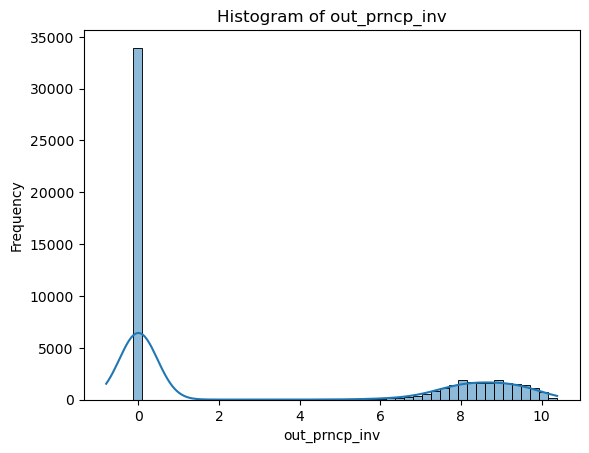

Plotting histogram for total_payment


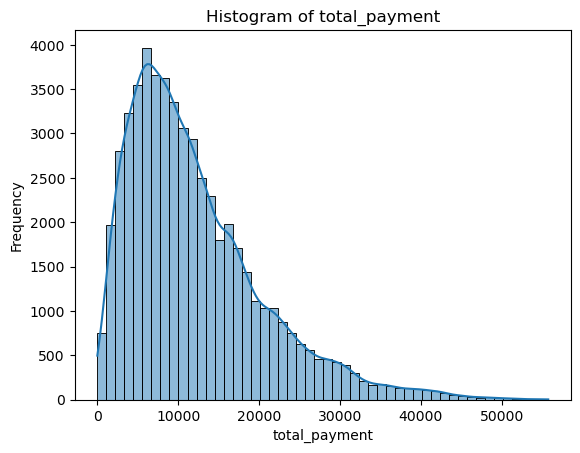

Plotting histogram for total_payment_inv


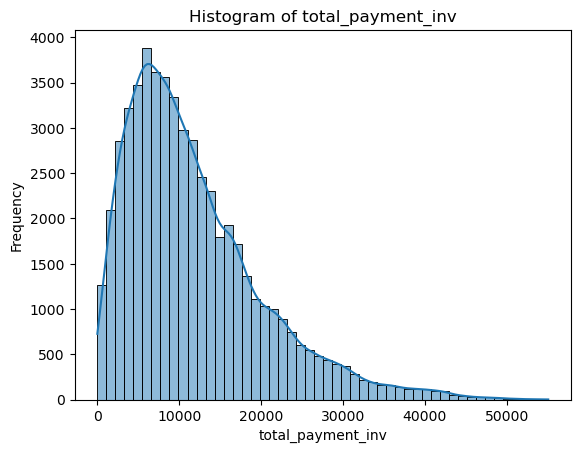

Plotting histogram for total_rec_prncp


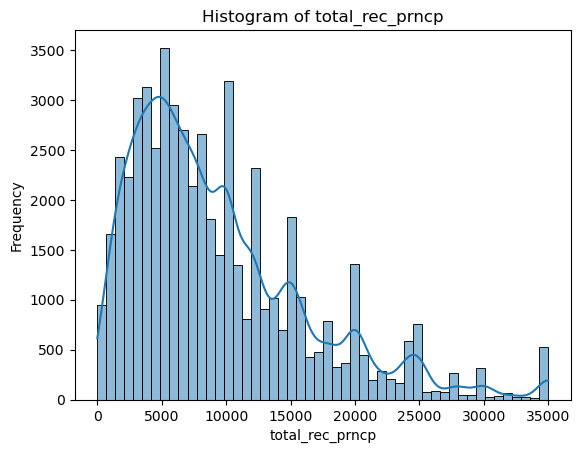

Plotting histogram for total_rec_int


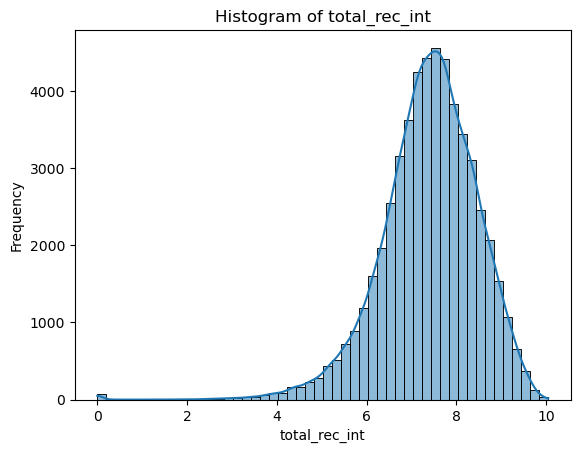

Plotting histogram for total_rec_late_fee


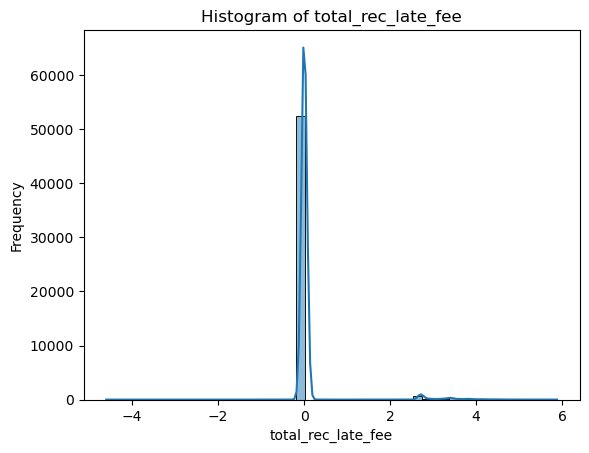

Plotting histogram for recoveries


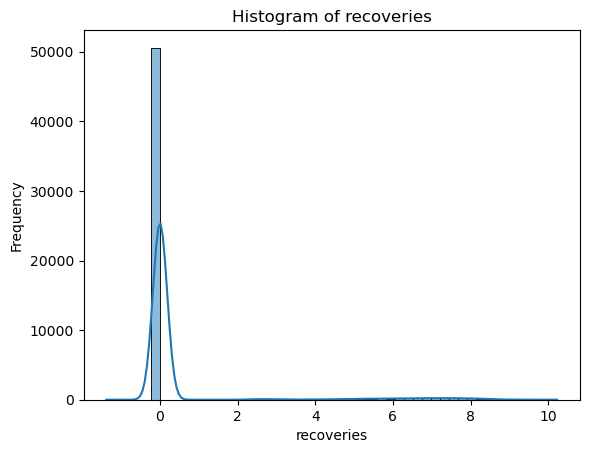

Plotting histogram for collection_recovery_fee


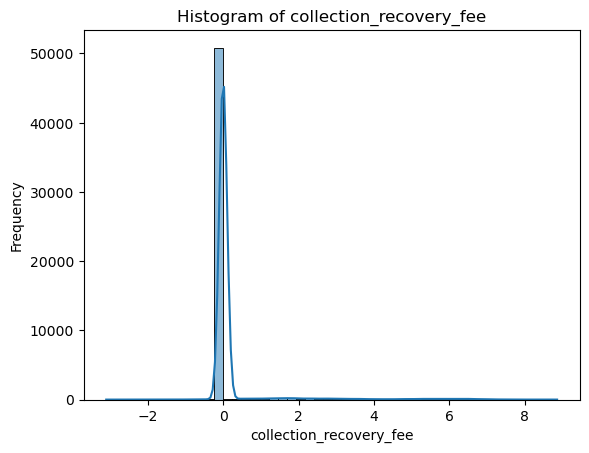

Plotting histogram for last_payment_amount


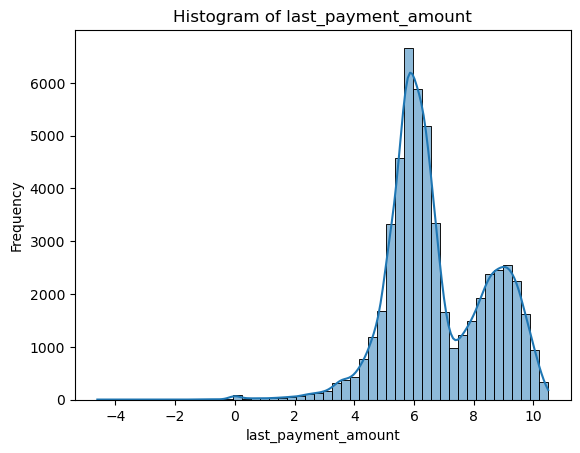

Plotting histogram for collections_12_mths_ex_med


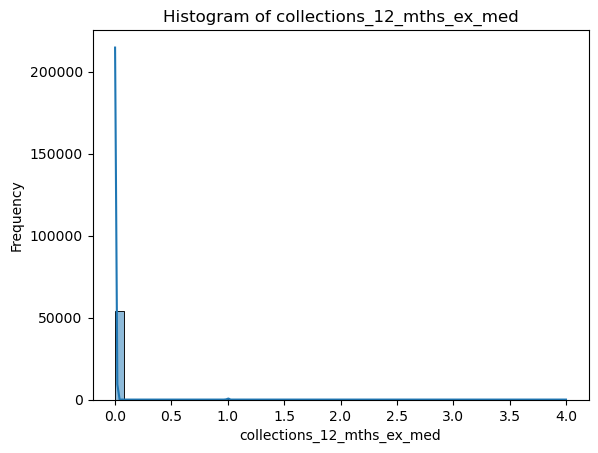

Plotting histogram for mths_since_last_major_derog


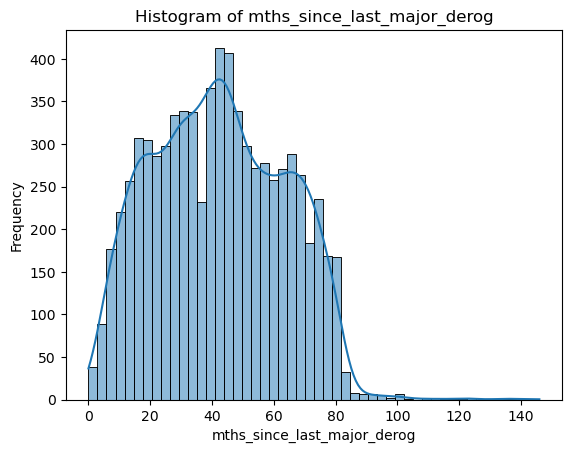

Plotting histogram for policy_code


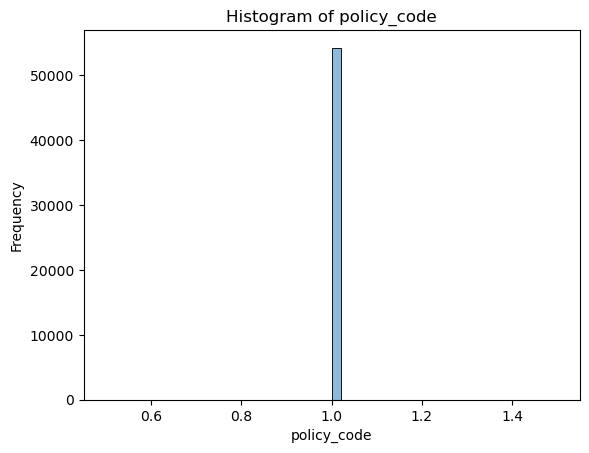

In [20]:
print("Plotting histograms for all numeric columns to check for outliers...")
plotter.plot_all_numeric_columns()